# Importing Lib

In [3]:
#importing imp Lib for Project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
np.set_printoptions(precision=4)
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score , confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

Importing Data

In [4]:
data = pd.read_csv('Data.csv')
data

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469,1
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794,1
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474,1
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982,1
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,0.781588,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,0.029890,0
6815,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,0.781586,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,0.038284,0
6816,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,0.781546,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,0.097649,0
6817,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,0.781663,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,0.044009,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 95 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 1    ROA(A) before interest and % after tax                   6819 non-null   float64
 2    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 3    Operating Gross Margin                                   6819 non-null   float64
 4    Realized Sales Gross Margin                              6819 non-null   float64
 5    Operating Profit Rate                                    6819 non-null   float64
 6    Pre-tax net Interest Rate                                6819 non-null   float64
 7    After-tax net Interest Rate                              6819 non-null   float64
 8    Non-industry inco

In [4]:
data.shape

(6819, 95)

In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ROA(C) before interest and depreciation before interest,6819.0,0.505180,0.060686,0.0,0.476527,0.502706,0.535563,1.0
ROA(A) before interest and % after tax,6819.0,0.558625,0.065620,0.0,0.535543,0.559802,0.589157,1.0
ROA(B) before interest and depreciation after tax,6819.0,0.553589,0.061595,0.0,0.527277,0.552278,0.584105,1.0
Operating Gross Margin,6819.0,0.607948,0.016934,0.0,0.600445,0.605997,0.613914,1.0
Realized Sales Gross Margin,6819.0,0.607929,0.016916,0.0,0.600434,0.605976,0.613842,1.0
...,...,...,...,...,...,...,...,...
Liability to Equity,6819.0,0.280365,0.014463,0.0,0.276944,0.278778,0.281449,1.0
Degree of Financial Leverage (DFL),6819.0,0.027541,0.015668,0.0,0.026791,0.026808,0.026913,1.0
Interest Coverage Ratio (Interest expense to EBIT),6819.0,0.565358,0.013214,0.0,0.565158,0.565252,0.565725,1.0
Equity to Liability,6819.0,0.047578,0.050014,0.0,0.024477,0.033798,0.052838,1.0


In [21]:
data.isnull().sum()

0

# Visualinzing the Data Distribution

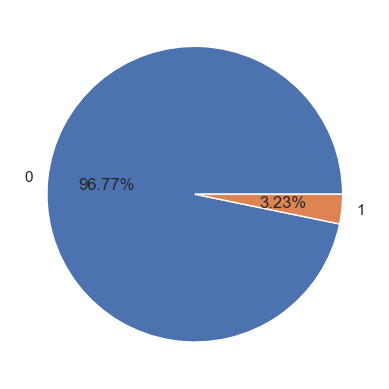

In [6]:
data = data["Bankrupt"].value_counts()
plt.pie(data,autopct='%1.2f%%',labels=data.index)
plt.show()

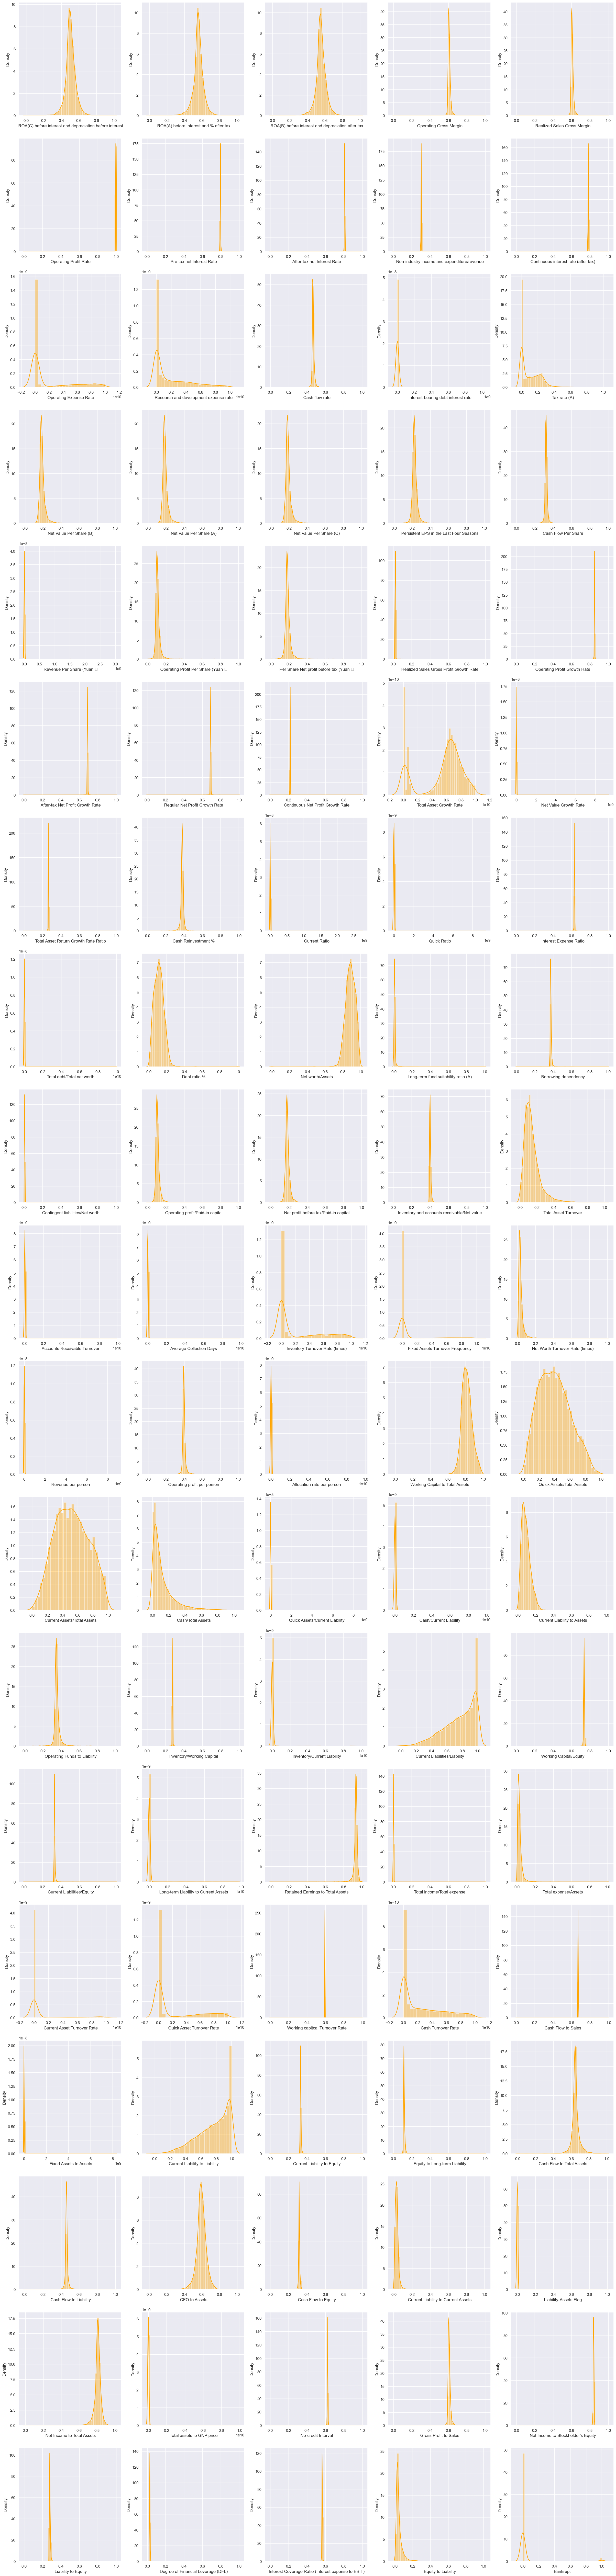

In [6]:
#dist plot
fig, ax=plt.subplots(ncols=5,nrows=19,figsize=(30,130))
index=0
ax=ax.flatten()

for cols,value in data.items():
    sns.distplot(value,ax=ax[index],color="orange")
    index+=1

# Spiliting Data into Dependent and Independent Variables

In [5]:
X = data.drop(['Bankrupt'], axis = 1)
Y = data['Bankrupt']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1234)

In [8]:
X_train.shape, X_test.shape

((5455, 94), (1364, 94))

# Treating Multicolinearity

In [9]:
def correlation(data, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [10]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

33

In [11]:
corr_features

{' After-tax net Interest Rate',
 ' CFO to Assets',
 ' Cash Flow to Liability',
 ' Cash Flow to Sales',
 ' Cash Reinvestment %',
 ' Continuous interest rate (after tax)',
 ' Current Assets/Total Assets',
 ' Current Liabilities/Equity',
 ' Current Liability to Assets',
 ' Current Liability to Equity',
 ' Current Liability to Liability',
 ' Equity to Long-term Liability',
 ' Gross Profit to Sales',
 ' Inventory and accounts receivable/Net value',
 ' Liability to Equity',
 ' Net Income to Total Assets',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Net Worth Turnover Rate (times)',
 ' Net profit before tax/Paid-in capital',
 ' Non-industry income and expenditure/revenue',
 ' Operating Funds to Liability',
 ' Operating Profit Per Share (Yuan �',
 ' Operating profit/Paid-in capital',
 ' Per Share Net profit before tax (Yuan �',
 ' Persistent EPS in the Last Four Seasons',
 ' Pre-tax net Interest Rate',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and 

In [12]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Cash Flow Per Share,...,Cash Flow to Total Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
2444,0.513041,0.595526,0.998971,2.860000e+09,0.000000e+00,0.462674,0.000589,0.000000,0.194176,0.320082,...,0.624707,0.311147,0.035768,0,0.023804,0.623475,0.840244,0.030062,0.568967,0.024425
4065,0.425974,0.610992,0.998790,4.579210e-04,4.273500e-04,0.467089,0.000000,0.000000,0.172264,0.320117,...,0.655453,0.315991,0.011227,0,0.000476,0.623953,0.837298,0.026791,0.565158,0.073395
1101,0.533174,0.608578,0.999028,1.807400e-04,0.000000e+00,0.460691,0.000262,0.257415,0.193629,0.316864,...,0.635215,0.313559,0.027112,0,0.001231,0.623787,0.842134,0.026811,0.565252,0.045620
5506,0.564081,0.624728,0.999354,1.141330e-04,5.090000e+08,0.480748,0.000376,0.015690,0.185369,0.328252,...,0.681354,0.319453,0.024053,0,0.003687,0.622331,0.843135,0.026850,0.565425,0.049093
2178,0.471408,0.609147,0.999035,1.833990e-04,0.000000e+00,0.478441,0.000772,0.021257,0.177447,0.340702,...,0.649065,0.315490,0.020211,0,0.002413,0.623152,0.840515,0.027116,0.566343,0.033458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5292,0.492614,0.602344,0.999000,1.092760e-04,1.550000e+09,0.463080,0.000270,0.361069,0.183136,0.323760,...,0.683315,0.323086,0.029366,0,0.002702,0.623955,0.841319,0.026840,0.565380,0.021633
4808,0.558816,0.605522,0.999102,5.830000e+09,1.550000e+09,0.460052,0.000000,0.162365,0.200834,0.316192,...,0.655910,0.316086,0.016215,0,0.003510,0.624575,0.842761,0.026791,0.565159,0.064898
930,0.460732,0.594676,0.998857,1.287030e-04,4.500000e+09,0.464946,0.000383,0.000000,0.170326,0.324609,...,0.628855,0.311860,0.080966,0,0.000844,0.626541,0.838388,0.026610,0.564119,0.023766
775,0.540097,0.611669,0.999120,1.387640e-04,3.570000e+09,0.475537,0.000548,0.254783,0.188319,0.339924,...,0.679017,0.319880,0.034731,0,0.000756,0.623706,0.841795,0.026968,0.565881,0.034873


# Treating Data Imbalance

In [14]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=1234)

X_smote, y_smote = sm.fit_resample(X_train, y_train)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_smote.shape}''')

print('\nBalance of positive and negative classes (%):')
y_smote.value_counts(normalize=True) * 100

Shape of X before SMOTE: (6819, 94)
Shape of X after SMOTE: (10550, 94)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: Bankrupt, dtype: float64

# Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_smote = sc.fit_transform(X_smote)
X_test = sc.transform(X_test)

# Building Models

In [16]:
rfm = RandomForestClassifier(n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='auto',
    bootstrap=True) #default parameters
rfm.fit(X_smote, y_smote)
rfm_pred = rfm.predict(X_test)

print('Random Forest initial Performance:')
print('----------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test, rfm_pred)*100)
print('F1 Score        : ', metrics.f1_score(y_test, rfm_pred)*100)
print('Precision       : ', metrics.precision_score(y_test, rfm_pred)*100)
print('Recall          : ', metrics.recall_score(y_test, rfm_pred)*100)
print('Confusion Matrix:\n ', confusion_matrix(y_test, rfm_pred)*100)

Random Forest initial Performance:
----------------------------------
Accuracy        :  95.45454545454545
F1 Score        :  40.38461538461539
Precision       :  32.8125
Recall          :  52.5
Confusion Matrix:
  [[128100   4300]
 [  1900   2100]]


<AxesSubplot:>

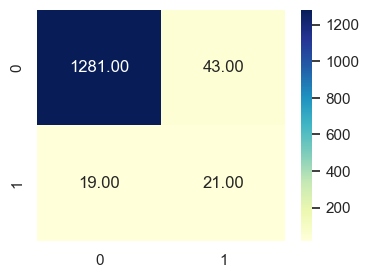

In [17]:
confusion_matrix_test=confusion_matrix(y_test, rfm_pred)
fig,ax=plt.subplots(figsize=(4,3))
sns.heatmap(confusion_matrix_test,annot=True,ax=ax,cmap='YlGnBu',fmt='.2f')

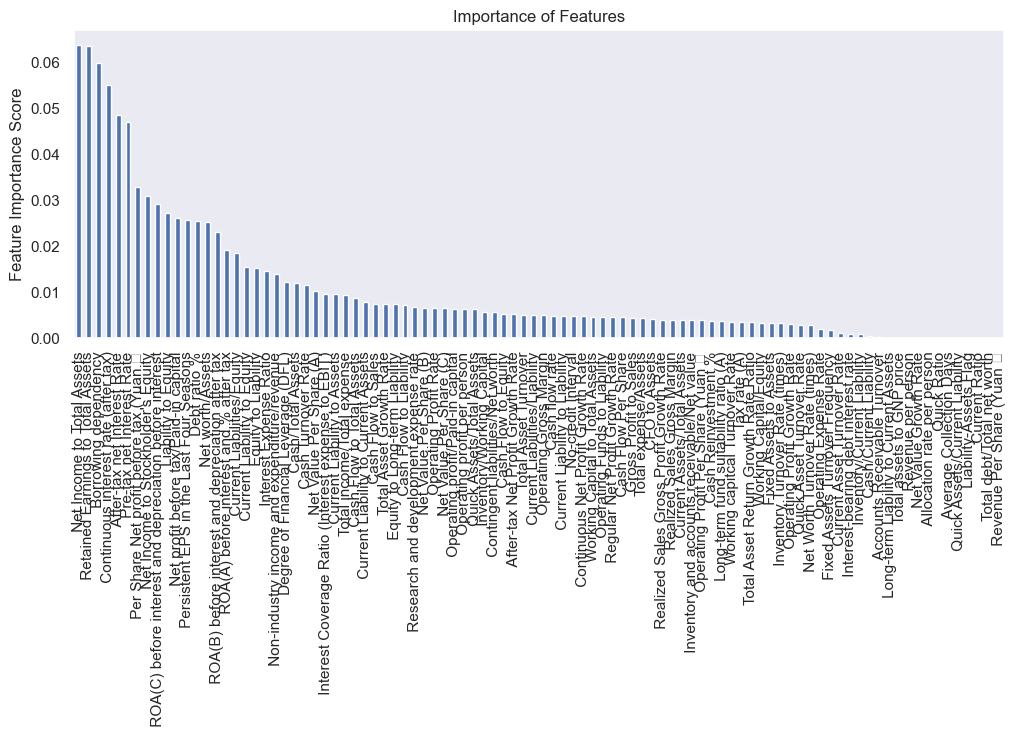

In [18]:
#Importance of feature
feat_imp = pd.Series(rfm.feature_importances_, list(X_train)).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 4))
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
plt.grid()
plt.show()

In [19]:
lrm = LogisticRegression(C=1.0,solver='lbfgs',) #default parameters
lrm.fit(X_smote, y_smote)
lrm_pred = lrm.predict(X_test)

print('Logistic Regression initial Performance:')
print('----------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test, lrm_pred)*100)
print('F1 Score        : ', metrics.f1_score(y_test, lrm_pred)*100)
print('Precision       : ', metrics.precision_score(y_test, lrm_pred)*100)
print('Recall          : ', metrics.recall_score(y_test, lrm_pred)*100)
print('Confusion Matrix:\n ', confusion_matrix(y_test, lrm_pred))

Logistic Regression initial Performance:
----------------------------------------
Accuracy        :  88.92961876832844
F1 Score        :  26.34146341463415
Precision       :  16.363636363636363
Recall          :  67.5
Confusion Matrix:
  [[1186  138]
 [  13   27]]
